In [30]:
import numpy as np
import pandas as pd

In [37]:
x1 = np.random.uniform(0,1,20000)
x2 = np.random.uniform(0,1,20000)
x3 = np.random.uniform(0,1,20000)
x4 = np.random.uniform(0,1,20000)
x5 = np.random.uniform(0,1,20000)
x6 = np.random.uniform(0,1,20000)
x7 = np.random.uniform(0,1,20000)
x8 = np.random.uniform(0,1,20000)
x9 = np.random.uniform(0,1,20000)
x10= np.random.uniform(0,1,20000)

### Create Drifts
One incremntal drift:

Start @ [5000]: changes x1, x3 and x5. They are now drawn from np.random.uniform(0,1+i) with i = 1
After every 1000 datapoints x1, x3 and x5 i += 1.
Stop when i = 10

In [38]:
j = 0
for i in range(1,6):
    x1[4000+j:5000+j]=np.random.uniform(0,1+i,1000)
    x3[4000+j:5000+j]=np.random.uniform(0,1+i,1000)
    x5[4000+j:5000+j]=np.random.uniform(0,1+i,1000)
    
    j += 1000
    
x1[10000:12000]=np.random.uniform(4,5,2000)
x3[10000:12000]=np.random.uniform(4,5,2000)
x5[10000:12000]=np.random.uniform(4,5,2000)

x1[12000:14000]=np.random.uniform(6,7,2000)
x3[12000:14000]=np.random.uniform(6,7,2000)
x5[12000:14000]=np.random.uniform(6,7,2000)

prob = 0
for i in range(14001,20000):
    
    if i % 1000 == 0:
        prob += 0.1
    
    if np.random.uniform(prob,1,1) > 0.5:
        x1[i]=np.random.uniform(0,6,1)
        x3[i]=np.random.uniform(0,6,1)
        x5[i]=np.random.uniform(0,6,1)
        
    else:
        x1[i]=np.random.uniform(6,7,1)
        x3[i]=np.random.uniform(6,7,1)
        x5[i]=np.random.uniform(6,7,1)

y = 10*np.sin(np.pi*x1*x2)+20*(x3-0.5)**2 + 10*x4 + 5*x5 + np.random.normal(0,1)


In [39]:
data = pd.DataFrame([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y]).transpose()
data.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10', 'y']

In [40]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.897321,0.871495,0.981482,0.877933,0.235587,0.913040,0.625955,0.206052,0.271606,0.922445,20.093205
1,0.736969,0.413174,0.807349,0.684588,0.883988,0.512864,0.166916,0.871917,0.539002,0.410409,20.501513
2,0.774969,0.670499,0.187000,0.540838,0.062420,0.338006,0.071489,0.089775,0.813275,0.227461,16.834902
3,0.548341,0.273407,0.092220,0.453832,0.196873,0.169741,0.251528,0.072348,0.136957,0.990100,12.560081
4,0.944682,0.398486,0.564490,0.483747,0.278871,0.295531,0.517975,0.458322,0.278207,0.772571,14.745078
...,...,...,...,...,...,...,...,...,...,...,...
19995,5.786531,0.037321,4.640778,0.293583,0.789468,0.992683,0.545693,0.073721,0.630606,0.876233,355.253923
19996,5.902571,0.946868,1.139992,0.453205,2.332299,0.987149,0.321964,0.638116,0.700106,0.779147,13.947344
19997,3.464108,0.530671,0.304673,0.505173,2.151635,0.082599,0.094496,0.051476,0.373486,0.985452,10.882763
19998,3.919626,0.839989,2.232013,0.727648,0.212811,0.613633,0.909225,0.791047,0.583197,0.543694,59.563621


In [45]:
data.to_csv('friedman_with_noreturn_drift.csv', index=False)

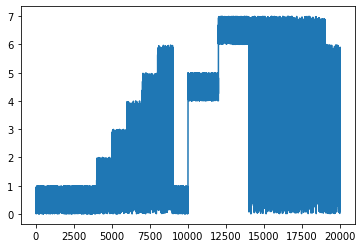

In [41]:
import matplotlib.pyplot as plt
plt.plot(data['x1'])

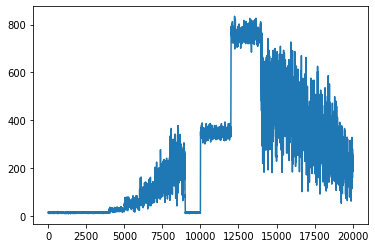

In [44]:
plt.plot(data['y'].rolling(10).mean())